In [1]:
import os
import gzip
import datetime as dt
import pandas as pd
from glob import glob
from textblob import TextBlob as TB  # sentiment analysis

In [2]:
THRESHOLD = 0.1
DATA_DIR = '../data/'
TWEETS_DATA_DIR = DATA_DIR + 'tweets/'

In [3]:
# locate files
files = glob(TWEETS_DATA_DIR + '*')
print(len(files), 'files with tweets')

505 files with tweets


In [4]:
# load one file to play with
df = pd.read_csv(gzip.open(files[0]))

In [5]:
# generate sentiments
df['dirty_sentiment'] = df.text.apply(lambda x: TB(x).sentiment)
df['dirty_polarity'] = df.dirty_sentiment.apply(lambda x: x.polarity)
df['dirty_subjectivity'] = df.dirty_sentiment.apply(lambda x: x.subjectivity)

In [6]:
# plot results
df.hist(['dirty_polarity', 'dirty_subjectivity'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d2cbb1dd8>,
      dtype=object)

In [7]:
# lets look at 0 polarity tweets
for x in df[df.dirty_polarity==0].text[:20]:
    print(x, '\n')

NBT Bank N A NY Has $3,951,000 Position in UnitedHealth Group Incorporated $UNH http://zpr.io/PqvPT  

Justice Department Probing Premium Assistance for Dialysis Patients http://www.wsj.com/articles/justice-department-probing-premium-assistance-for-dialysis-patients-1483747046 … $DVA (buffet stock) $UNH 

Strs Ohio Purchases 28,088 Shares of UnitedHealth Group Incorporated $UNH http://zpr.io/Pq4HW  

Weekly Dow #Stocks Trend $NKE $DIS $PFE $UTX $IBM $AAPL $GS $BA $V $MSFT $AXP $GE $MCD $INTC $MMM $VZ $MRK $UNH  @ http://12Stocks.com/dow  

Seizert Capital Partners LLC Has $3,810,000 Position in UnitedHealth Group Incorporated $UNH http://www.dailypolitical.com/?p=874281  

Seizert Capital Partners LLC Has $3,810,000 Position in UnitedHealth Group Incorporated $UNH http://ift.tt/2iNRTp8  

Dow #Stocks Trend $NKE $DIS $UTX $IBM $PFE $AAPL $GS $BA $V $MSFT $MCD $GE $AXP $INTC $MMM $VZ $MRK $UNH $JPM  @ http://12Stocks.com/dow  

Obamacare Failed Because It Made More Sense to Remain Uninsu

In [8]:
# Maybe links are the problem, lets get rid of them
def is_link(s):
    X = ['http', 'www']
    s = s.lower()
    return any(x in s for x in X)

def has_link(s):
    return any(is_link(x) for x in s.split())

def strip_links(s):
    s = str(s)
    return ' '.join(x for x in s.split() if not is_link(x))

s = 'www.google.com is the best search engine'
print(is_link(s), has_link(s), strip_links(s), sep='\n')

True
True
is the best search engine


In [9]:
df['has_link'] = df.text.apply(has_link)
df['clear_text'] = df.text.apply(strip_links)
df['sentiment'] = df.clear_text.apply(lambda x: TB(x).sentiment)
df['polarity'] = df.sentiment.apply(lambda x: x.polarity)
df['subjectivity'] = df.sentiment.apply(lambda x: x.subjectivity)

In [10]:
df['is_pos'] = df.polarity > THRESHOLD
df['is_neg'] = df.polarity < -THRESHOLD

In [11]:
df['date'] = df.timestamp.apply(lambda x: pd.Timestamp(x).date())

In [12]:
pos = df[df.is_pos].groupby('date').date.count().fillna(0)
neg = df[df.is_neg].groupby('date').date.count().fillna(0)

In [13]:
def calculate_ratio(group):
    n_pos = group.is_pos[group.is_pos].count()
    n_neg = group.is_pos[group.is_neg].count()
    ratio = n_pos/(n_pos+n_neg)
    return ratio
    
ratios = df.groupby('date').apply(calculate_ratio)

/home/armiamali/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


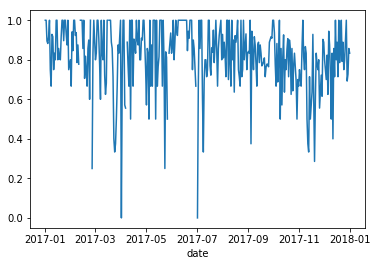

In [14]:
ratios.plot()

In [15]:
def get_sentiment(x):
    try:
        return TB(str(x)).sentiment
    except:
        pass
    return None

def parse(filepath):
    symbol = os.path.split(filepath)[1]
    symbol = symbol[:symbol.find('.')]
        
    df = pd.read_csv(gzip.open(filepath, 'rt'))
    df['clear_text'] = df.text.apply(strip_links)
    df['sentiment'] = df.clear_text.apply(lambda x: TB(x).sentiment)
    df = df[df.sentiment.notnull()]
    df['polarity'] = df.sentiment.apply(lambda x: x.polarity)
    df['subjectivity'] = df.sentiment.apply(lambda x: x.subjectivity)
    
    df['is_pos'] = df.polarity > THRESHOLD
    df['is_neg'] = df.polarity < -THRESHOLD
    
    df['date'] = df.timestamp.apply(lambda x: pd.Timestamp(x).date())
    
    gb = df.groupby('date')
    ratios = gb.apply(calculate_ratio)
    counts = gb.date.count()
    return symbol, ratios, counts
    

In [21]:
ratios_df = pd.DataFrame()
counts_df = pd.DataFrame()
files = glob(TWEETS_DATA_DIR + '*')

In [31]:
while files:
    print(files[0])
    symbol, ratios, counts = parse(files[0])
    ratios_df[symbol] = ratios
    counts_df[symbol] = counts
    del files[0]

../data/tweets/DUK.csv.gz


/home/armiamali/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


../data/tweets/ZION.csv.gz
../data/tweets/AZO.csv.gz
../data/tweets/BAC.csv.gz
../data/tweets/ADSK.csv.gz
../data/tweets/CTAS.csv.gz
../data/tweets/CNC.csv.gz
../data/tweets/PSA.csv.gz
../data/tweets/PCAR.csv.gz
../data/tweets/BDX.csv.gz
../data/tweets/FFIV.csv.gz
../data/tweets/MU.csv.gz
../data/tweets/MDT.csv.gz
../data/tweets/FOX.csv.gz
../data/tweets/TJX.csv.gz
../data/tweets/KORS.csv.gz
../data/tweets/NI.csv.gz
../data/tweets/COP.csv.gz
../data/tweets/SPGI.csv.gz
../data/tweets/ALK.csv.gz
../data/tweets/RHI.csv.gz
../data/tweets/PNW.csv.gz
../data/tweets/ORCL.csv.gz
../data/tweets/TTWO.csv.gz
../data/tweets/BF-B.csv.gz
../data/tweets/DFS.csv.gz
../data/tweets/SLB.csv.gz
../data/tweets/STT.csv.gz
../data/tweets/APTV.csv.gz
../data/tweets/TXN.csv.gz
../data/tweets/UAL.csv.gz
../data/tweets/MET.csv.gz
../data/tweets/AET.csv.gz
../data/tweets/A.csv.gz
../data/tweets/EL.csv.gz
../data/tweets/HP.csv.gz
../data/tweets/FTV.csv.gz
../data/tweets/EXPE.csv.gz
../data/tweets/RF.csv.gz
../data

In [47]:
n_good = (counts_df.max() > 100).sum()
n_good

298

In [46]:
ratios_df.to_csv(DATA_DIR + 'sentiments.csv')
counts_df.to_csv(DATA_DIR + 'tweets_counts.csv')